<a href="https://colab.research.google.com/github/Lee-Gunju/Lee-Gunju/blob/master/Leegunju_assign05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Plot the training data [2pt]

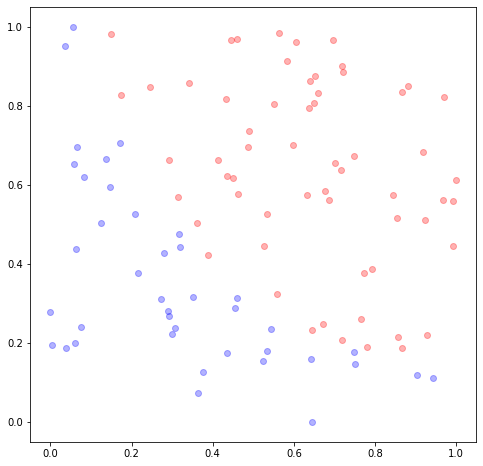

In [167]:

import csv
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler



data    = np.genfromtxt("data.txt", delimiter=',')

min_max_scaler = MinMaxScaler()
data = min_max_scaler.fit_transform(data)

x_data       = data[:, [0]]
y_data       = data[:, [1]]
label_data   = data[:, [2]]

x_label0    = x_data[label_data == 0]
x_label1    = x_data[label_data == 1]

y_label0    = y_data[label_data == 0]
y_label1    = y_data[label_data == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')


2. Plot the estimated parameters [3pt]

In [168]:

x = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.placeholder(tf.float32, shape=[None, 1])
label = tf.placeholder(tf.float32, shape=[None, 1])

w1 = tf.Variable(tf.random_normal([1]), name = 'weight1')
w2 = tf.Variable(tf.random_normal([1]), name = 'weight2')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X,W) + b))
hypothesis = tf.sigmoid(x*w1+ y*w2 +b)

# cost/loss function  
cost = tf.reduce_mean(- label * tf.log(hypothesis) - (1- label) * tf.log(1 - hypothesis))

# cost 함수를 미분 수식으로는 (W:) 과정! 
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost) 

#Accuracy computation 
#True if hypothesis > 0.5 else false
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, label), dtype = tf.float32))

w1_list = []
w2_list = []
b_list = []
cost_list = []
hypothesis_list = []
hypothesis_list_test = []
correct_test = []
epochs = 20001

x_test = np.arange(30,100,0.5).reshape(140,1)
y_test = np.arange(30,100,0.5).reshape(140,1)

x_test = min_max_scaler.fit_transform(x_test)
y_test = min_max_scaler.fit_transform(y_test)


# launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(epochs):
        cost_val, _, w1_val, w2_val, b_val = sess.run([cost, train, w1, w2, b], feed_dict = {x: x_data, y:y_data, label:label_data})
        w1_list.append(w1_val)
        w2_list.append(w2_val)
        b_list.append(b_val)
        cost_list.append(cost_val)
        if step % 1000 == 0 :
            print(step, cost_val, w1_val, w2_val, b_val)
    

    # accuracy report 
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict = {x: x_data, y:y_data, label:label_data})
    
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)
    hypothesis_list.append(h)

    h, c = sess.run([hypothesis, predicted],
                      feed_dict = {x: x_test, y:y_test})
    print("\nHypothesis_test: ", h, "\nCorrect_test (Y): ", c)
    hypothesis_list_test.append(h)
    correct_test.append(c)


0 1.1166157 [-0.95623916] [-0.394476] [-0.56528884]
1000 0.62145764 [0.2163833] [0.6003613] [0.131705]
2000 0.5688694 [0.713469] [0.9442214] [-0.26674825]
3000 0.5267245 [1.1419395] [1.2480322] [-0.6476575]
4000 0.49247268 [1.5243136] [1.529128] [-0.9896311]
5000 0.4643129 [1.8678772] [1.7902361] [-1.2980623]
6000 0.440874 [2.1785893] [2.0335402] [-1.5781745]
7000 0.42112514 [2.461457] [2.2610145] [-1.8342829]
8000 0.4042925 [2.7206297] [2.4743965] [-2.069909]
9000 0.3897922 [2.9595218] [2.6752014] [-2.2879257]
10000 0.37717956 [3.1809435] [2.8647408] [-2.4906883]
11000 0.36611244 [3.387208] [3.0441494] [-2.6801348]
12000 0.3563247 [3.5802333] [3.2144086] [-2.8578773]
13000 0.34760666 [3.7616186] [3.3763716] [-3.0252614]
14000 0.33979145 [3.9327018] [3.5307827] [-3.183424]
15000 0.33274478 [4.0946126] [3.6782954] [-3.333326]
16000 0.32635772 [4.2483077] [3.8194852] [-3.4757917]
17000 0.32054073 [4.3946123] [3.9548576] [-3.6115308]
18000 0.3152198 [4.5342245] [4.084865] [-3.741157]
1900

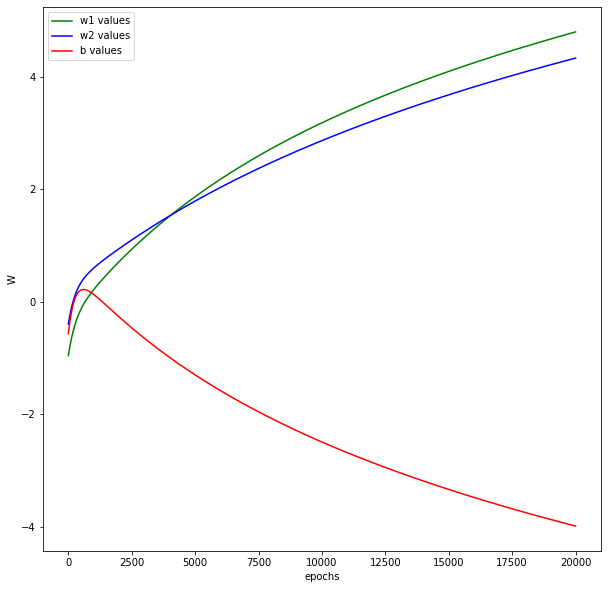

In [169]:
plt.plot(range(epochs), w1_list, 'g', label = 'w1 values')
plt.plot(range(epochs), w2_list, 'b', label = 'w2 values')
plt.plot(range(epochs), b_list, 'r', label = 'b values')    
plt.ylabel('W')
plt.xlabel('epochs')
plt.rcParams["figure.figsize"] = (10,10)
plt.legend()
plt.show()

3. Plot the training error [3pt]



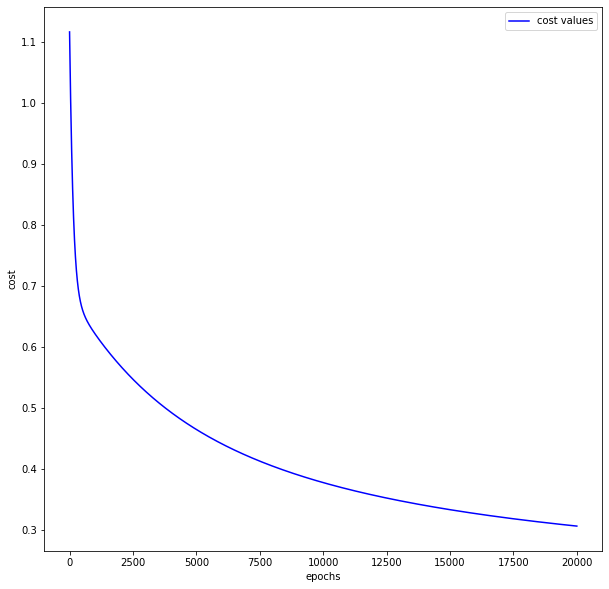

In [170]:
plt.plot(range(epochs), cost_list, 'b', label = 'cost values')
plt.ylabel('cost')
plt.xlabel('epochs')
plt.rcParams["figure.figsize"] = (10,10)
plt.legend()
plt.show()

4. Plot the obtained classifier [4pt]



No handles with labels found to put in legend.


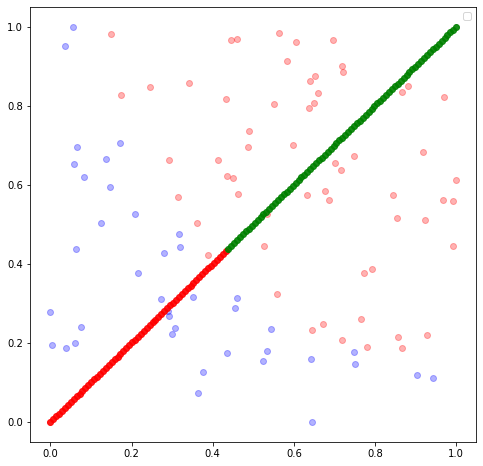

In [171]:
test_hypo = np.array(hypothesis_list_test).reshape(140,1)
test_corr = np.array(correct_test).reshape(140,1)
test = np.hstack((test_hypo, test_corr))

#x_test, y_test = np.meshgrid(x_test, y_test)
#x_test = x_test.reshape(len(x_test) * len(x_test[0]), 1)
#y_test = y_test.reshape(len(y_test) * len(y_test[0]), 1)

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')


for i in range(len(test_hypo)):
  if test_hypo[i][0] > 0.5:
    plt.scatter(x_test[i][0], y_test[i][0], alpha=0.9, c='g')
  else :
    plt.scatter(x_test[i][0], y_test[i][0], alpha=0.9, c='r') 
plt.legend()
plt.show()